In [13]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [14]:
#Importing the Dataset and Extracting independent and dependent variables
Companies = pd.read_csv("/1000_Companies.csv")
X = Companies.iloc[:, :-1].values
y = Companies.iloc[:, 4].values

Companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

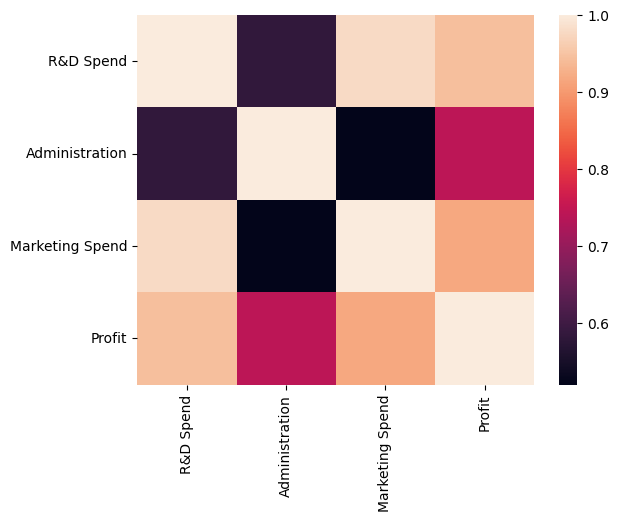

In [16]:
#Data Visualization
#Buliding the Coorelation Matrix
sns.heatmap(Companies.corr(numeric_only=True))

In [19]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Replace the deprecated OneHotEncoder with ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough') # Define the ColumnTransformer to apply OneHotEncoder only to column index 3 (State)
X = ct.fit_transform(X) # Fit and transform the data using the ColumnTransformer

In [20]:
#Avoiding Dummy Variable Trap
X = X[:, 1:]


In [21]:
# creating the linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#fitting the Linear Regression to our training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
#predicting the test results
y_pred = regressor.predict(X_test)

In [25]:
print(y_pred)

[ 89790.61532915  88427.07187361  94894.67836971 175680.86725611
  83411.73042088 110571.90200074 132145.2293644   91473.37719686
 164597.05380607  53222.826674    66950.19050989 150566.43987005
 126915.20858596  59337.85971049 177513.91053062  75316.2814305
 118248.14406603 164574.40699902 170937.2898107  182069.11645085
 118845.03252689  85669.95112228 180992.59396144  84145.08220144
 105005.83769214 101233.56772746  53831.0766909   56881.41475223
  68896.39346904 210040.00765885 120778.72270894 111724.87157654
 101487.90541517 137959.02649624  63969.95996742 108857.91214126
 186014.72531989 171442.64130748 174644.26529205 117671.49128195
  96731.37857433 165452.2577941  107724.34331255  50194.54176912
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671744 131137.87699644 184880.70924517 174609.08266881
  93745.66352058  78341.13383417 180745.90439081  84461.61490552
 142900.90602903 170618.44098397  84365.09530838 105307.3716218
 141660.07290787  52527.343

In [26]:
# calculating the coeeficients
print(regressor.coef_)


[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [27]:
# calculating the intercept
print(regressor.intercept_)

-51035.229724047706


In [28]:
# calculating the R square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268908